--- Data Head ---
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N  


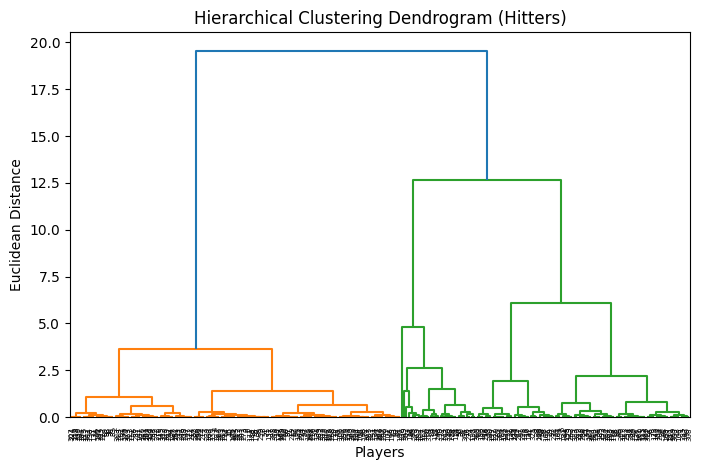


--- Clustered Data ---
   CRuns  Cluster
0     30        1
1    321        3
2    224        1
3    828        2
4     48        1

Cluster-wise Average Cumulative Runs:
Cluster
1     118.732558
2    1046.000000
3     489.333333
Name: CRuns, dtype: float64


In [2]:
# --- Import Libraries ---
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# --- (a) Load Dataset ---
df = pd.read_csv("hitters.csv")
print("--- Data Head ---")
print(df.head())

# --- (b) Data Preprocessing ---
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


df.fillna(df.mean(numeric_only=True), inplace=True)

# Select the relevant column for clustering
X = df[['CRuns']]

# Standardize data (important for clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- (c) Apply Hierarchical Clustering ---
Z = linkage(X_scaled, method='ward')

# --- (d) Plot Dendrogram ---
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Hitters)")
plt.xlabel("Players")
plt.ylabel("Euclidean Distance")
plt.show()

# --- (e) Form Clusters ---
clusters = fcluster(Z, t=3, criterion='maxclust')

df['Cluster'] = clusters

# --- (f) Display Results ---
print("\n--- Clustered Data ---")
print(df[['CRuns', 'Cluster']].head())


print("\nCluster-wise Average Cumulative Runs:")
print(df.groupby('Cluster')['CRuns'].mean())
